# Skrypt badający występowanie słów w korpusie.

## wersja 1
Użytkownik podaje słowo. Aplikacja wypisuje w których tekstach oraz w których zdaniach wystąpiło podane słowo. 


Wyświetlić powinny się numer tekstu, numer zdania oraz całe zdanie. Uwaga, szukane słowo może pojawić się wielokrotnie w jednym tekście lub w jednym zdaniu!
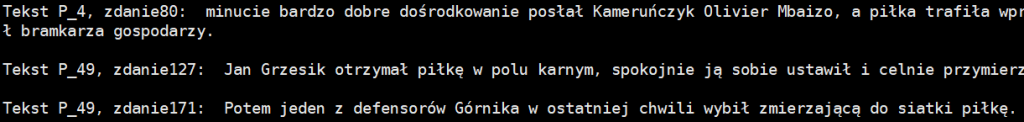

## wersja 2
Użytkownik podaje słowo. Skrypt odpowiada listą numerów tekstów w których się to słowo znajduje. Następnie wyświetla w kolejnych wierszach, numer tekstu oraz słowo z jego otoczeniem (+/- 4 słowa).

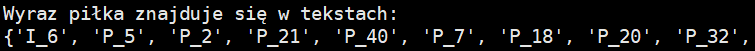
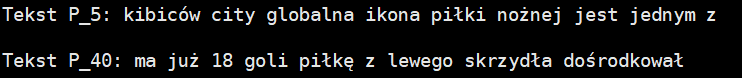

UWAGA\
do wykanania są obie wersje dla pliku `pap.txt`\
oczywiście obowiązuje odmiana słów (CLP)

In [3]:
import re
from clp3 import clp

def base(word):
    word = word.lower()
    ids = clp.rec(word)
    if ids:
        return clp.bform(ids[0])
    return word

def load_text(path="pap.txt"):
    with open(path, "r", encoding="utf-8") as file:
        text = file.read()
    fragments = [f.strip() for f in text.split("#") if f.strip()]
    return fragments

def version1(word, fragments):
    word_b = base(word)
    text_number = 1

    for block in fragments:
        sentences = block.split("\n")
        sentence_number = 1
        for sentence in sentences:
            words = re.findall(r"[a-żA-Ż]+", sentence.lower())
            base_forms = [base(w) for w in words]
            
            if word_b in base_forms:
                print(f"Tekst {text_number}, zdanie {sentence_number}: {sentence} \n")
            sentence_number += 1
        text_number += 1

def version2(word, fragments):
    word_b = base(word)
    text_numbers_with_word = []

    for text_number, block in enumerate(fragments, start=1):
        words = re.findall(r"[a-żA-Ż]+", block.lower())
        base_forms = [base(w) for w in words]

        if word_b in base_forms:
            text_numbers_with_word.append(text_number)

    if text_numbers_with_word:
        print(f"Wyraz '{word}' znajduje się w tekstach: {text_numbers_with_word}")

    for text_number, block in enumerate(fragments, start=1):
        words = re.findall(r"[a-żA-Ż]+", block.lower())
        base_forms = [base(w) for w in words]
        indices = [i for i, bf in enumerate(base_forms) if bf == word_b]

        for i in indices:
            left = max(0, i - 4)
            right = min(len(base_forms), i + 5)
            fragment = " ".join(base_forms[left:right])
            print(f"Tekst {text_number}: {fragment}")

fragments = load_text()
word = input("Podaj słowo: ").strip().lower()
choice = input("Wersja: ").strip()

if choice == "1":
    print()
    version1(word, fragments)
elif choice == "2":
    print()
    version2(word, fragments)

Podaj słowo:  minister
Wersja:  2



Wyraz 'minister' znajduje się w tekstach: [1, 17, 76, 79, 80, 81, 87, 88, 89, 124, 131, 133, 176, 178, 187, 190, 192, 214, 246, 247, 248, 252, 254, 266, 311, 322, 354, 379, 380, 384, 390, 403, 406, 438, 446, 460, 462, 505, 506, 552, 561, 608, 623, 651, 674, 699, 726, 731, 739, 753, 781, 782, 795, 806, 850, 852, 894, 903, 906, 907, 957, 959, 960, 961, 981, 1001, 1003, 1010, 1014, 1017, 1018, 1019, 1031, 1062, 1069, 1071, 1072, 1081, 1093, 1096, 1141, 1142, 1182, 1206, 1208, 1218, 1225, 1267, 1272, 1275, 1277, 1355, 1364, 1366, 1377, 1410, 1434, 1437, 1438, 1440, 1441, 1450, 1452, 1534, 1535, 1538, 1541, 1546, 1563, 1636, 1651, 1735, 1750, 1828, 1839, 1902, 1925, 1939, 1941, 1966, 1969, 2017, 2030, 2069, 2077, 2101, 2174, 2175, 2185, 2213, 2215, 2220, 2253, 2270, 2286, 2371, 2372, 2434, 2437, 2472, 2515, 2519, 2524, 2599, 2600, 2604, 2617, 2689, 2696, 2699, 2708, 2729, 2792, 2797, 2799, 2826, 2875, 2885, 2892, 2893, 2894, 2905, 2952, 2962, 2963, 2971, 2972, 2981, 3021, 3022, 3027, 3029,